# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m$^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [13]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K
T = 800 +273.15 #Temperature, K

k_fwd = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s
beta = 0.5

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

n_elec = 2
X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92



"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Calculated

In [14]:
G_rxn_0 = g_Vac_elyte_o + g_Vac_Ni_o + g_H2O_Ni_o - (g_Ox_elyte_o +2*g_H_Ni_o)
krev = k_fwd/(exp (-G_rxn_0/(R*T)*(C_elyte*C_Ni_s**2/(C_Ni_s*C_Ni_s*C_elyte))))

print (G_rxn_0)
print (krev)

-41297505.0
406763.55684408266


### Add some calculations to the following code block:
From the equation solved for in the homework

$i_o = n_{elect} Fk^{*(1-\beta)}_{fwd,j}k^{*\beta}_{rev,j}\prod C^{(1-\beta)v^,_k}_{ac,k} \prod C^{(\beta)v^"_k}_{ac,k}$

$\prod C^{(1-\beta)v^,_k}_{ac,k} = (\theta_{O^{2-}_{elyte(s)}} \theta_{H_{Ni(s)}}^{2})^{1-\beta}$

$\prod C^{(\beta)v^"_k}_{ac,k} = (\theta_{[ ]_{elyte(s)}} \theta_{H_{2}O_{Ni(s)}} \theta_{[ ]_{elyte(s)}})^{-1\beta} $

In [16]:
delta_phi = np.linspace(-0.9,0.05,100) #what happened to 0.15 to -1.0?
i_elementary = np.zeros_like(delta_phi)
kfwds = np.zeros_like(delta_phi)
krevs = np.zeros_like(delta_phi)
C_fwd = (X_Ox_elyte*X_H_Ni**2)**(1-beta)
C_rev = (X_Vac_elyte*X_Ox_elyte*X_H2O_Ni)**beta
print (C_fwd)
print (C_rev)

0.5754997827975263
0.12132600710482482


In [22]:
# Loop over these delta phi = phi_anode - phi_elyte values:

for ind, E in enumerate(delta_phi):
    kfwds[ind] = k_fwd*exp(-beta*n_elec*F*delta_phi[ind]/(R*T))
    krevs[ind] = krev*exp((1-beta)*n_elec*F*delta_phi[ind]/(R*T))
    i_elementary[ind] = n_elec*F*kfwds[ind]*krevs[ind]*C_fwd*C_rev


Plot the results:

Text(0, 0.5, 'Current [A/m2]')

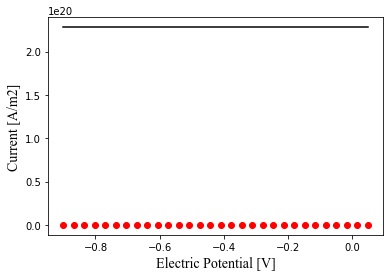

In [23]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

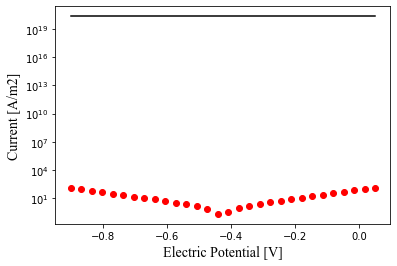

In [24]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

Add some text to _THIS MARKDOWN BLOCK_ to discuss the plots above.  

Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validation data?  If not, what might be missing from your code?

I don't know

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [27]:
phi_eq = - G_rxn_0/(n_elec*F)
i_BV = np.zeros_like(delta_phi)
eta =np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    eta[ind] = delta_phi[ind] - phi_eq
    i_BV[ind] = i_elementary[ind]*(exp(-beta*n_elec*F*eta[ind]/(R*T))-exp((1-beta)*n_elec*F*eta[ind]/(R*T)))

#### Let's plot the BV and Marcus currents together:

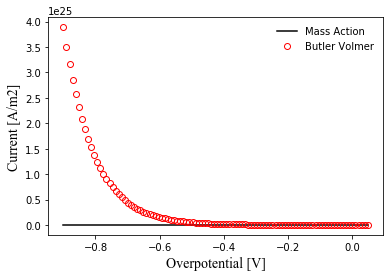

In [28]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results.

How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

Add your thoughts to _THIS MARKDOWN BLOCK_

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [29]:
i_Tafel = np.zeros_like(delta_phi)
a = 0.5

for ind, E in enumerate(delta_phi):
    
    i_Tafel[ind] = - i_elementary[ind]*exp(-a*F/(R*T)*eta[ind])

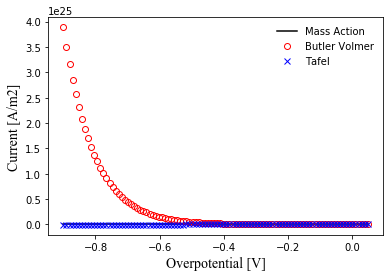

In [30]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

In [ ]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.1))
plt.ylim((-100,0))
plt.show()

#### Discussion:
